In [20]:
# Import the necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # visualization
import seaborn as sns   # visualization
%matplotlib inline

In [43]:
df = pd.read_csv("D:/dat5/sales_w05.csv",sep=",")
df1 = pd.read_csv("D:/dat5/sales_w06.csv",sep=",")
print df.shape
print df1.shape
# axis = 0 is row wise concatenation
df2 = pd.concat((df,df1),axis=0)
df2.size

(25000, 27)
(25000, 27)


1350000

In [12]:
print df2.size

1350000


In [15]:
df2.columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 24999
Data columns (total 27 columns):
Unnamed: 0        50000 non-null int64
Row.ID            50000 non-null int64
Order_ID          50000 non-null object
Order_Date        50000 non-null object
Ship_Date         50000 non-null object
Ship_Mode         50000 non-null object
Customer_ID       50000 non-null object
Customer.Name     50000 non-null object
Segment           49992 non-null object
City              50000 non-null object
State             50000 non-null object
Country           50000 non-null object
Postal.Code       8088 non-null float64
Market            50000 non-null object
Region            50000 non-null object
Product.ID        50000 non-null object
Category          50000 non-null object
Sub.Category      50000 non-null object
Product.Name      50000 non-null object
Sales             49888 non-null object
Quantity          50000 non-null int64
Discount          50000 non-null float64
Profit       

** Perform Sanity Check & Data Preprocessing **
    - Explore the missing values
    - Exclude columns that are not required for this analysis
    - Remove special characater if any from numeric varaibles
    - Check for outliers

In [16]:
df2.isnull().sum()
# postal code and sales columns (112) have missing values 

Unnamed: 0            0
Row.ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer.Name         0
Segment               8
City                  0
State                 0
Country               0
Postal.Code       41912
Market                0
Region                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales               112
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
Return                0
Returned              0
dtype: int64

In [17]:
df2.head()

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.0,762.1845,933.57,Critical,No,0
1,2,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes,1
2,3,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,No,0
3,4,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.5400,910.16,Medium,No,0
4,5,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.5200,903.04,Critical,No,0


In [44]:
df2['Sales'] = pd.to_numeric(df['Sales'].str.replace(r'[$,]', ''))
df2.head()
# now $ and , got removed 

,Unnamed: 0,Row.ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer.Name,Segment,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,1,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,No,0
1,2,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes,1
2,3,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,No,0
3,4,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,No,0
4,5,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,No,0


In [45]:
df2.dtypes

Unnamed: 0          int64
Row.ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer.Name      object
Segment            object
City               object
State              object
Country            object
Postal.Code       float64
Market             object
Region             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
Return             object
Returned            int64
dtype: object

In [47]:
#df_agg = df.groupby(["State","Category"]).agg({'Sales':"sum"})
#df_agg
df_agg = df2.groupby(['Country','Category']).agg({'Sales':"sum"})
df_agg

Sales
Country              Category                     
Afghanistan          Furniture        2.216082e+04
                     Office Supplies  5.636400e+03
                     Technology       1.264134e+04
Albania              Furniture        1.555560e+03
                     Office Supplies  7.849200e+02
                     Technology       4.710180e+03
Algeria              Furniture        1.582188e+04
                     Office Supplies  2.069622e+04
                     Technology       2.614416e+04
Angola               Furniture        1.663146e+04
                     Office Supplies  1.200954e+04
                     Technology       1.657032e+04
Argentina            Furniture        4.335920e+04
                     Office Supplies  1.667426e+04
                     Technology       3.662375e+04
Australia            Furniture        6.585629e+05
                     Office Supplies  3.977035e+05
                     Technology       6.526352e+05
Austria              Furniture        4.762182e+04
                     Office Supplies  5.964738e+04
                     Technology       6.292080e+04
Azerbaijan           Furniture        5.025420e+03
                     Office Supplies  1.324200e+03
                     Technology       2.951940e+03
Bahrain              Technology       1.250040e+03
Bangladesh           Furniture        5.882262e+04
                     Office Supplies  1.591524e+04
                     Technology       6.646398e+04
Barbados             Furniture        5.145880e+03
                     Office Supplies  1.189720e+03
...                                            ...
Ukraine              Office Supplies  4.826016e+04
                     Technology       5.294778e+04
United Arab Emirates Furniture        4.494960e+02
United Kingdom       Furniture        2.589837e+05
                     Office Supplies  2.825151e+05
                     Technology       4.086242e+05
United States        Furniture        1.396569e+06
                     Office Supplies  1.176826e+06
                     Technology       1.568009e+06
Uruguay              Furniture        1.205277e+04
                     Office Supplies  5.318600e+03
                     Technology       8.520800e+02
Uzbekistan           Furniture        7.444200e+02
                     Office Supplies  3.162180e+03
                     Technology       8.640180e+03
Venezuela            Furniture        1.254368e+04
                     Office Supplies  1.300082e+04
                     Technology       1.700010e+04
Vietnam              Furniture        4.094164e+04
                     Office Supplies  3.472434e+04
                     Technology       4.319051e+04
Yemen                Furniture        1.497420e+02
                     Office Supplies  2.043468e+03
                     Technology       1.594494e+03
Zambia               Furniture        1.978092e+04
                     Office Supplies  1.310964e+04
                     Technology       1.645128e+04
Zimbabwe             Furniture        1.712466e+03
                     Office Supplies  1.592370e+03
                     Technology       1.557684e+03

[402 rows x 1 columns]

In [48]:
#df_agg = df.groupby(["State","Category"]).agg({'Sales':"sum"})
#df_agg
df_agg = pd.pivot_table(df2,index=['Country','Category'],values=['Quantity','Sales'], aggfunc=[np.sum],dropna=False)
df_agg

sum              
                                     Quantity         Sales
Country              Category                              
Afghanistan          Furniture             80  2.216082e+04
                     Office Supplies      148  5.636400e+03
                     Technology            94  1.264134e+04
Albania              Furniture              4  1.555560e+03
                     Office Supplies       20  7.849200e+02
                     Technology            30  4.710180e+03
Algeria              Furniture             76  1.582188e+04
                     Office Supplies      322  2.069622e+04
                     Technology           132  2.614416e+04
Angola               Furniture             70  1.663146e+04
                     Office Supplies      210  1.200954e+04
                     Technology            90  1.657032e+04
Argentina            Furniture            536  4.335920e+04
                     Office Supplies      488  1.667426e+04
                     Technology           404  3.662375e+04
Australia            Furniture           4086  6.585629e+05
                     Office Supplies     6118  3.977035e+05
                     Technology          4506  6.526352e+05
Austria              Furniture            296  4.762182e+04
                     Office Supplies      854  5.964738e+04
                     Technology           426  6.292080e+04
Azerbaijan           Furniture             10  5.025420e+03
                     Office Supplies       30  1.324200e+03
                     Technology            16  2.951940e+03
Bahrain              Technology             4  1.250040e+03
Bangladesh           Furniture            328  5.882262e+04
                     Office Supplies      434  1.591524e+04
                     Technology           274  6.646398e+04
Barbados             Furniture             14  5.145880e+03
                     Office Supplies       30  1.189720e+03
...                                       ...           ...
Ukraine              Office Supplies      570  4.826016e+04
                     Technology           294  5.294778e+04
United Arab Emirates Furniture             12  4.494960e+02
United Kingdom       Furniture           1474  2.589837e+05
                     Office Supplies     4456  2.825151e+05
                     Technology          2244  4.086242e+05
United States        Furniture          11038  1.396569e+06
                     Office Supplies    13868  1.176826e+06
                     Technology         10174  1.568009e+06
Uruguay              Furniture             48  1.205277e+04
                     Office Supplies       34  5.318600e+03
                     Technology             2  8.520800e+02
Uzbekistan           Furniture              8  7.444200e+02
                     Office Supplies       42  3.162180e+03
                     Technology            78  8.640180e+03
Venezuela            Furniture            190  1.254368e+04
                     Office Supplies      324  1.300082e+04
                     Technology           166  1.700010e+04
Vietnam              Furniture            360  4.094164e+04
                     Office Supplies      536  3.472434e+04
                     Technology           448  4.319051e+04
Yemen                Furniture              2  1.497420e+02
                     Office Supplies       24  2.043468e+03
                     Technology            30  1.594494e+03
Zambia               Furniture             90  1.978092e+04
                     Office Supplies      202  1.310964e+04
                     Technology            74  1.645128e+04
Zimbabwe             Furniture             34  1.712466e+03
                     Office Supplies       60  1.592370e+03
                     Technology            34  1.557684e+03

[402 rows x 2 columns]

In [51]:
# produce a report month wise, day wise 
df2.dtypes

Unnamed: 0          int64
Row.ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer.Name      object
Segment            object
City               object
State              object
Country            object
Postal.Code       float64
Market             object
Region             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
Return             object
Returned            int64
dtype: object

In [54]:
import datetime as dt
df2['Order_Date'] = pd.to_datetime(df.Order_Date)
df2.dtypes
df2['year'] = df2['Order_Date'].dt.year
df2['month'] = df2['Order_Date'].dt.month
df2['day'] = df2['Order_Date'].dt.day
df2['dofweek'] = df2['Order_Date'].dt.dayofweek
print df2.year
print df2.month
print df2.day
print df2.dofweek

0        2012
1        2013
2        2013
3        2013
4        2013
5        2013
6        2011
7        2012
8        2014
9        2012
10       2011
11       2012
12       2011
13       2012
14       2013
15       2014
16       2014
17       2014
18       2014
19       2014
20       2012
21       2011
22       2011
23       2013
24       2014
25       2014
26       2011
27       2011
28       2013
29       2012
         ... 
24970    2013
24971    2012
24972    2013
24973    2014
24974    2014
24975    2011
24976    2014
24977    2013
24978    2012
24979    2014
24980    2014
24981    2013
24982    2013
24983    2013
24984    2014
24985    2013
24986    2014
24987    2011
24988    2012
24989    2011
24990    2014
24991    2014
24992    2014
24993    2014
24994    2011
24995    2013
24996    2013
24997    2012
24998    2014
24999    2011
Name: year, Length: 50000, dtype: int64
0         7
1         2
2        10
3         1
4        11
5         6
6        11
7         4
8        1

In [66]:
df_pv2 = pd.pivot_table(df2,index=['Category','dofweek'],values=['Sales'], aggfunc=[np.sum],dropna=False)
df_pv2

sum
                                Sales
Category        dofweek              
Furniture       0        1.357772e+06
                1        1.313783e+06
                2        1.278885e+06
                3        1.386900e+06
                4        1.441807e+06
                5        8.027567e+05
                6        1.587247e+05
Office Supplies 0        1.012037e+06
                1        1.095134e+06
                2        9.736452e+05
                3        1.028210e+06
                4        1.097330e+06
                5        5.504994e+05
                6        8.731307e+04
Technology      0        1.604550e+06
                1        1.648757e+06
                2        1.612265e+06
                3        1.614298e+06
                4        1.615422e+06
                5        7.631231e+05
                6        1.506944e+05

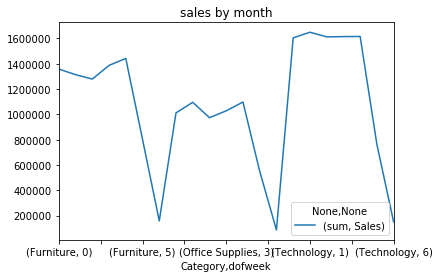

In [67]:
fig=plt.figure(figsize=(45,40))
ax1=df_pv2.plot(kind='line')
plt.title('sales by month')
plt.show
fig.savefig("D:/dat5/fig1.png",dpi=300)

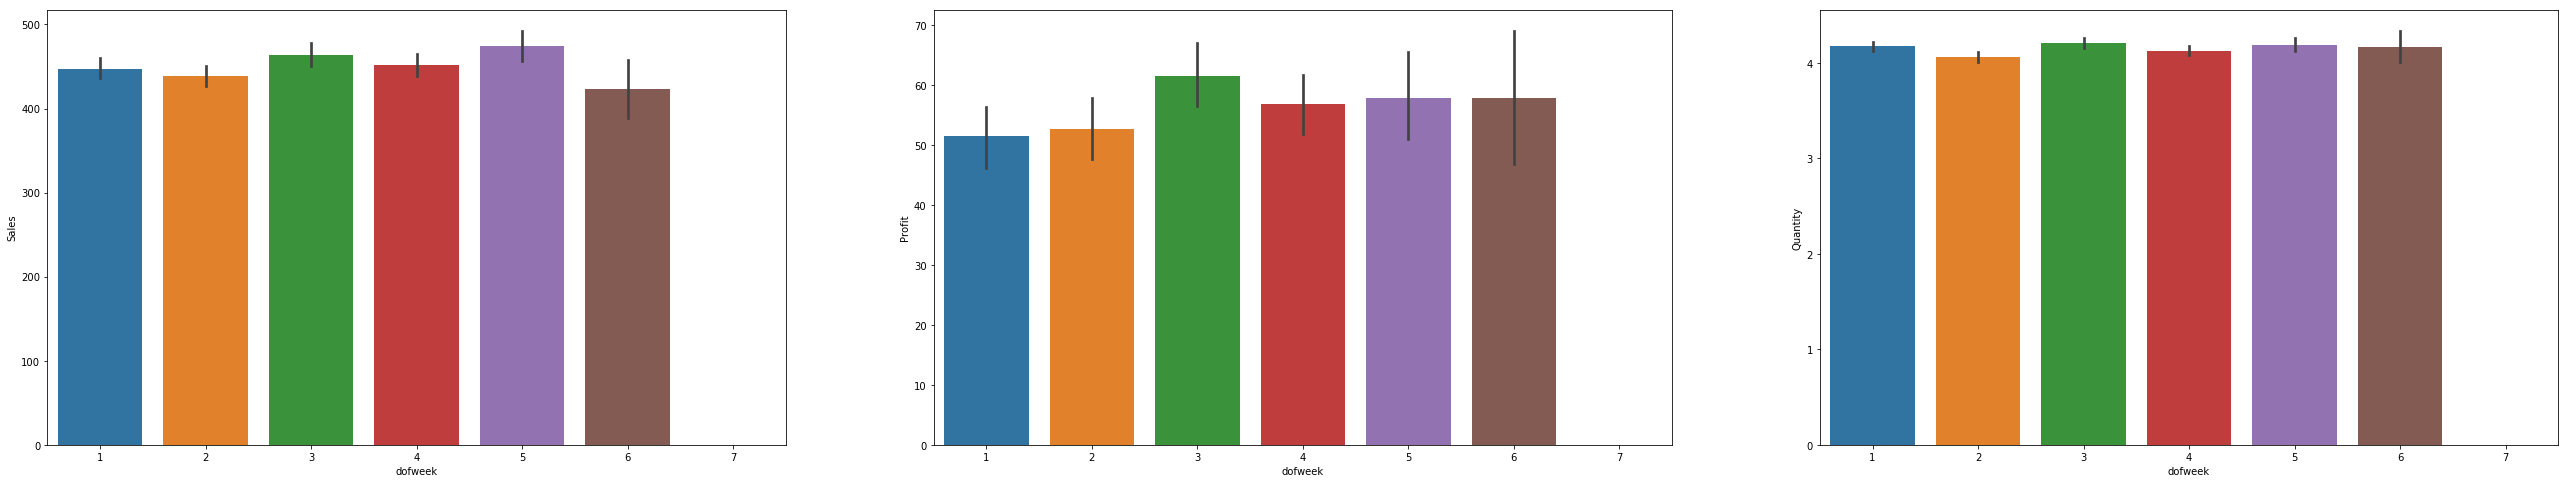

In [77]:
fig, (axis1,axis2,axis3) = plt.subplots(nrows=1,ncols=3,figsize=(45,8))

sns.barplot(x='dofweek',y='Sales',data=df2, order=[1,2,3,4,5,6,7],ax=axis1)
sns.barplot(x='dofweek',y='Profit',data=df2, order=[1,2,3,4,5,6,7],ax=axis2)
sns.barplot(x='dofweek',y='Quantity',data=df2, order=[1,2,3,4,5,6,7],ax=axis3)

In [74]:
df2.columns

Index([u'Unnamed: 0', u'Row.ID', u'Order_ID', u'Order_Date', u'Ship_Date',
       u'Ship_Mode', u'Customer_ID', u'Customer.Name', u'Segment', u'City',
       u'State', u'Country', u'Postal.Code', u'Market', u'Region',
       u'Product.ID', u'Category', u'Sub.Category', u'Product.Name', u'Sales',
       u'Quantity', u'Discount', u'Profit', u'Shipping_Cost',
       u'Order_Priority', u'Return', u'Returned', u'year', u'month', u'day',
       u'dofweek'],
      dtype='object')

In [80]:
seg_cat_sales = pd.pivot_table(df2,values='Sales',index='Segment', columns=['Category'],aggfunc='sum')
seg_cat_sales.head()

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,4.020355e+06,3.034324e+06,4.587315e+06
Corporate,2.368973e+06,1.754044e+06,2.688366e+06
Home Office,1.339303e+06,1.055801e+06,1.715542e+06


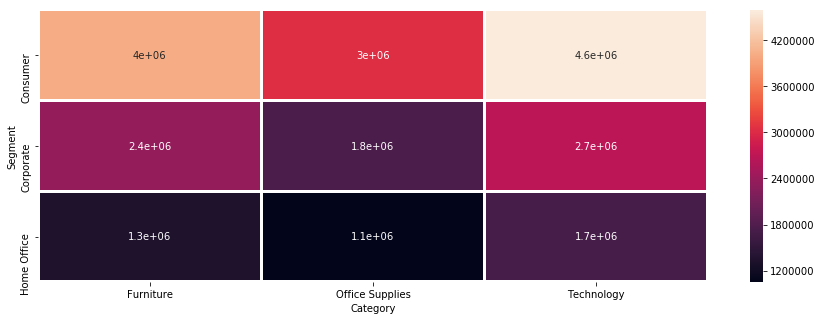

In [82]:
fig, (axis1)= plt.subplots(1,1,figsize=(15,5))
sns.heatmap(seg_cat_sales,annot=True,linewidth=2)

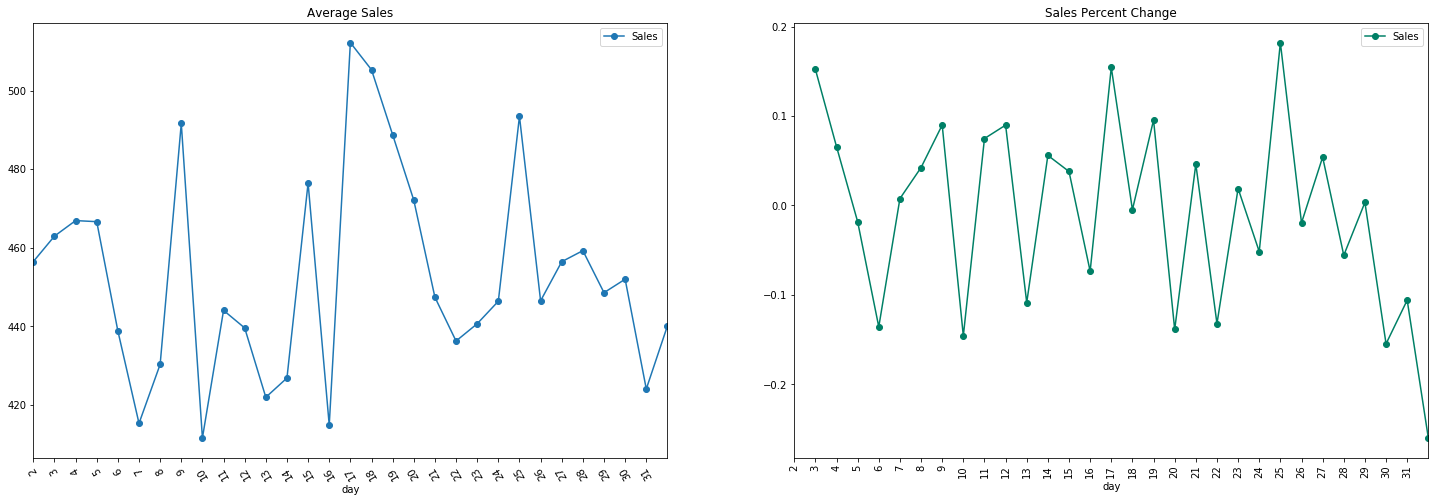

In [101]:
# group by date and get average sales, and precent change
average_sales   = df2.groupby('day')["Sales"].mean()
pct_change_sales = df2.groupby('day')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(25,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=120)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

Help on method set_xticklabels in module matplotlib.axes._base:

set_xticklabels(self, labels, fontdict=None, minor=False, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Set the xtick labels with list of strings *labels*
    
    Return a list of axis text instances.
    
    *kwargs* set the :class:`~matplotlib.text.Text` properties.
    Valid properties are
      agg_filter: unknown
      alpha: float (0.0 transparent through 1.0 opaque) 
      animated: [True | False] 
      axes: an :class:`~matplotlib.axes.Axes` instance 
      backgroundcolor: any matplotlib color 
      bbox: FancyBboxPatch prop dict 
      clip_box: a :class:`matplotlib.transforms.Bbox` instance 
      clip_on: [True | False] 
      clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
      color: any matplotlib color 
      contains: a callable function 
      family or fontfamily or fontname or name: [FO